<h2 style='text-align:center;font-size:80px;background-color:purple;border:80px;color:white'>   Loan Predicition Report Project . <h2>

# Problem Statement:


## This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Independent Variables:

- **Loan_ID**

- **Gender**

- **Married**

- **Dependents**

- **Education**

- **Self_Employed**

- **ApplicantIncome**

- **CoapplicantIncome**

- **Loan_Amount**

- **Loan_Amount_Term**

- **Credit History**

- **Property_Area**

## Dependent Variable (Target Variable):

- **`Loan_Status`**

### `You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. `

# ----------------------------------------------------------------------------------------------------

### Lets Import some library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Now import the dataset

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### This Dataset have 614 rows and 13 columns and out of this 13 columns one is target variable which is `Loan_Status`

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### Loan_id seems to be a irrelevent column 

In [5]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
264,LP001872,Male,No,0,Graduate,Yes,5166,0.0,128.0,360.0,1.0,Semiurban,Y
241,LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y


## There are NaN values too in the dataset ,which is needed to be filled

In [6]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:white'> EDA <h2>

In [7]:
# Now lets identify which types of data types do they all belongs

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### We can see that our target variable is Object type which make it a `classification problem`.. Rest all the input features are in both int64 , object and float64 . So for all the objects columns we will use Encoding techniques

In [8]:
# To get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset .. We can Notice the Null values present the dataset bcz of different Null Value counts

## NOW LETS CHECK THE NULL VALUES

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### We can see that NaN value are present in the dataset .. Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History have NaN values

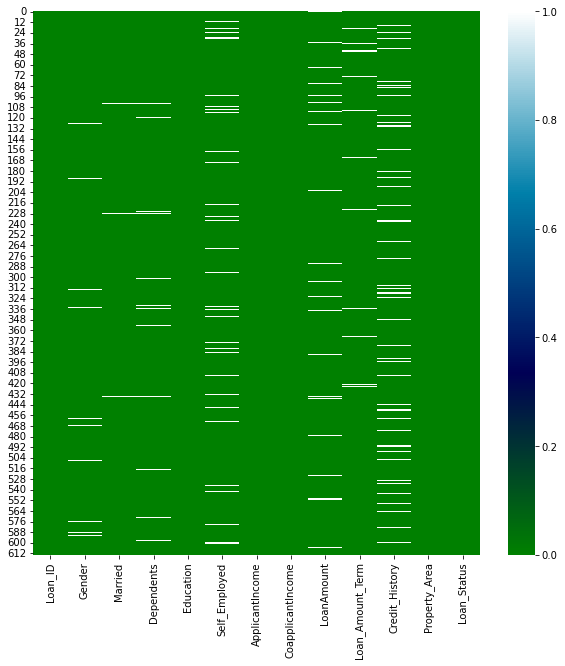

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap="ocean")
plt.show()

## Yes Null values are clearly visible through Heatmap

## Now Lets Fill these NaN Values

In [11]:
#Fill Gender NaN Value
print (df["Gender"].mode())
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

0    Male
Name: Gender, dtype: object


In [12]:
# Fill Married NaN Value
print (df["Married"].mode())
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

0    Yes
Name: Married, dtype: object


In [13]:
# Fill Dependent NaN Value

print (df["Dependents"].mode())
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

0    0
Name: Dependents, dtype: object


In [14]:
# Fill Self_Employed NaN Value

print (df["Self_Employed"].mode())
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

0    No
Name: Self_Employed, dtype: object


In [15]:
# Fill LoanAmount NaN Value
print (df["LoanAmount"].median())
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

128.0


In [16]:
# Fill Loan_Amount_Term NaN Value
print (df["Loan_Amount_Term"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

360.0


In [17]:
# Fill LoanAmount NaN Value
print (df["Credit_History"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())

1.0


## Now Lets Check the NaN Value again

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## All the Null Value inthe columns have been Filled accordingly

# Now Lets See the value counts of eaach columns

In [19]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Male      502
Female    112
Name: Gender, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Yes    401
No     213
Name: Married, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Graduate        480
Not Graduate    134
Name: Education, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
No     532
Yes     82
Name: Self_Employed, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Here we got to know that out dataset is imbalanced and we will try Balance it by Smote technique and here Our Loan Id column is irrelevent columns we are gonna drop this column

In [20]:
# Removing irrelevent column
df.drop("Loan_ID",axis=1,inplace=True)

In [21]:
#Lets check the Unique Values in each columns
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Its a classification problem as there are only 2 classes inside Loan_Status

In [22]:
# Lets Check again Income Value Count
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### We will balance this in later process and will make the value count of N same as Y by balancing it

In [23]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [24]:
# Checking wheather the target vaiable contains any space
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### We can see that No sape is present in the dataset

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:black'> A. Univariate Analysis <h2>

In [25]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

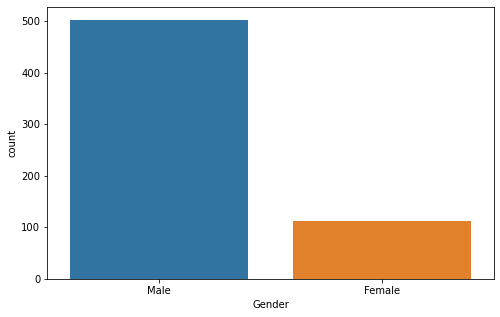

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(df['Gender'])
plt.show()

### The Count Of males are more As compared to Females 

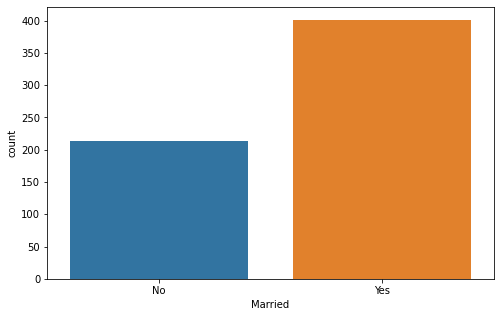

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df['Married'])
plt.show()

### The Count of Married People are More as Compared to the one not Married`

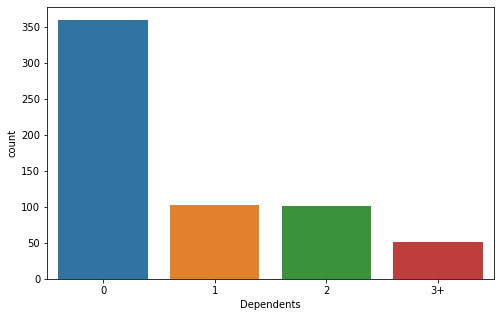

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(df['Dependents'])
plt.show()

### The Count of 0 Depenedent are more in number and the Least is 3+

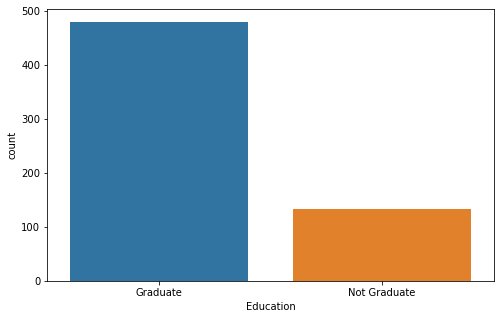

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df['Education'])
plt.show()

### The Count of Graduates are More in case of applying for Loans As Compared to Non Graduates

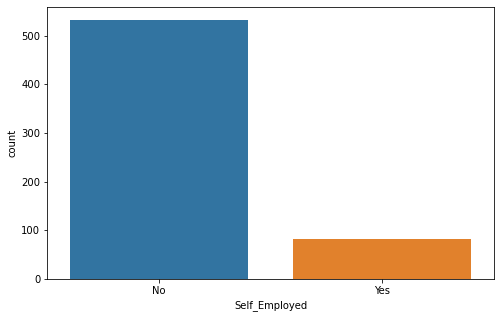

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(df['Self_Employed'])
plt.show()

## Maximum Number of count are the People who are Not self Employed and Very less people apply for who are self employed

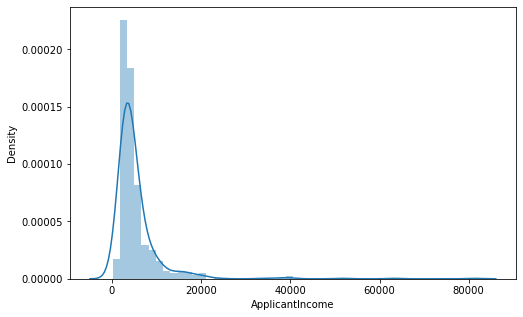

In [31]:
plt.figure(figsize=(8,5))
sns.distplot(df['ApplicantIncome'])
plt.show()

In [32]:
df['ApplicantIncome'].mean()

5403.459283387622

### Here are not getting much information from this Graph,but we know that what is the average income of the people applying for Loan,it is 5403

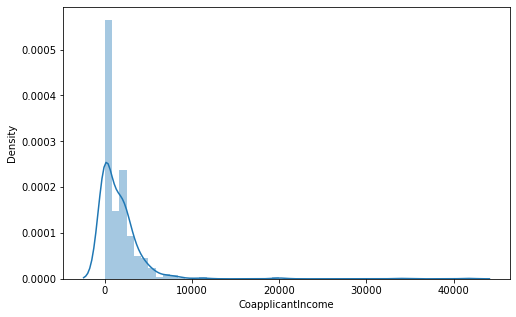

In [33]:

plt.figure(figsize=(8,5))
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [34]:
df['CoapplicantIncome'].mean()

1621.245798027101

### Co-applicant income seems to be on Zero by graph,the average is just 1621

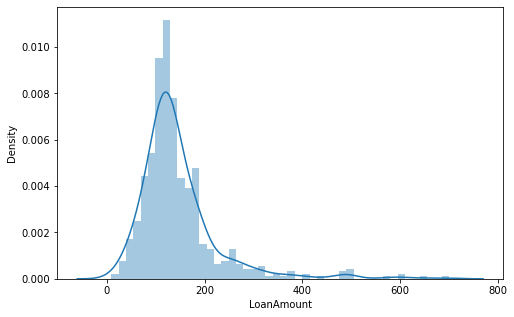

In [35]:
plt.figure(figsize=(8,5))
sns.distplot(df['LoanAmount'])
plt.show()

In [36]:
df['LoanAmount'].median()

128.0

### The average loan Amoount is 128

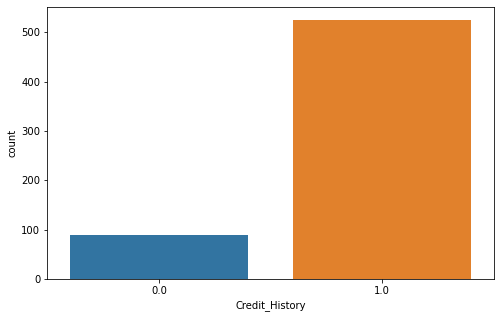

In [37]:

plt.figure(figsize=(8,5))
sns.countplot(df['Credit_History'])
plt.show()

### The maximum count is 1. which means yes they have a credit history

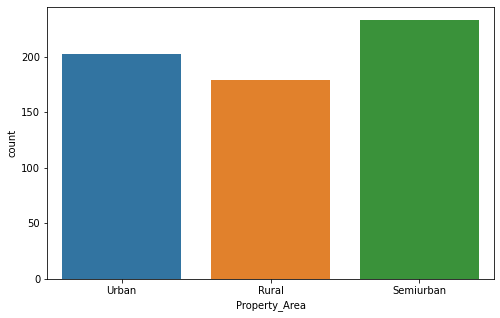

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(df['Property_Area'])
plt.show()

### We can see that maximum count for loan is from Semiurban area than followed by urban and least is Rural

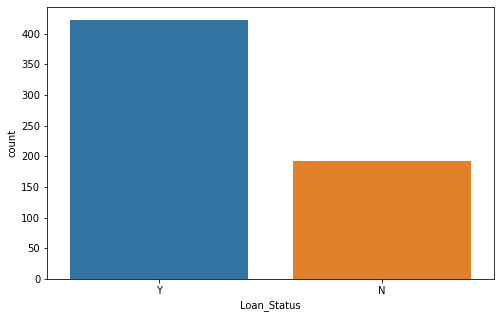

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(df['Loan_Status'])
plt.show()

### Count of Y is More than N ,which makes it a imbalanced dataset

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> B. Bivariate Analysis <h2>

In [40]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      502
Female    112
Name: Gender, dtype: int64


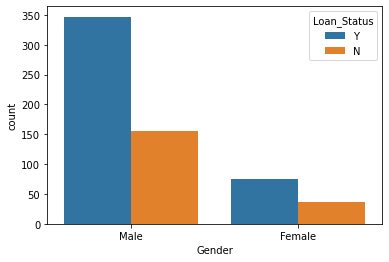

In [41]:
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()


### We can see that in case of Gender Males are getting more loans as Compared to Females, this may be because male applicant are more in number

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


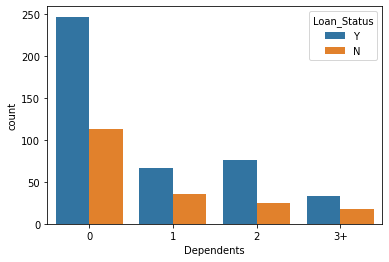

In [42]:
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

### We can see that people with 0 dependents are getting more Loans as compared to other this may be because the count of people with 0 dependent are more in number

Yes    401
No     213
Name: Married, dtype: int64


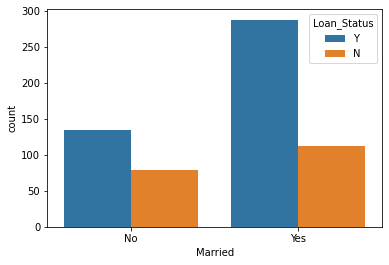

In [43]:
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"])
plt.show()

### We can see that maximum loan is Granted and apllied by the People who are Married as Compared to the People who are single

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


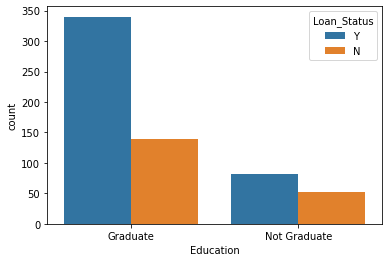

In [44]:
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

### We can see that the people who are Graduate are been granted Loans and compared to Not graduates .. this May because of his qualification or Education that makes my capable for the repayement of the loan

No     532
Yes     82
Name: Self_Employed, dtype: int64


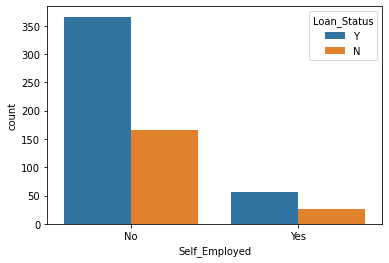

In [45]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

### There is a vast difference in count of No and Yes inside this columns .. We can see that the people who are not self employed has applied in large number and have been granted loan and people who are employed applied for loans are less

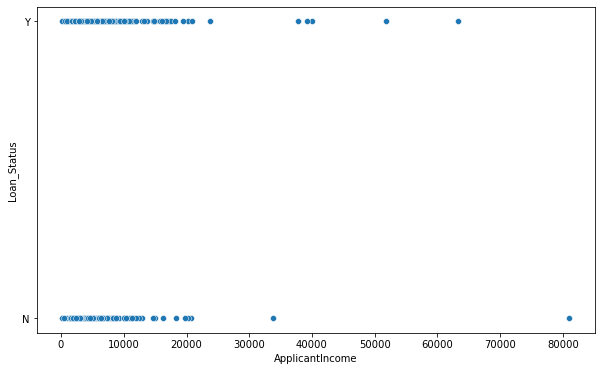

In [46]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=df["ApplicantIncome"],y=df["Loan_Status"])
plt.show()

### Till 210000 applicant income the loan_status is equally distributed till this range it caneither be yes or no too..but as we go above 210000 the chance of loan approval increase..This may be bcz the chance of repayment as increases

1.0    525
0.0     89
Name: Credit_History, dtype: int64


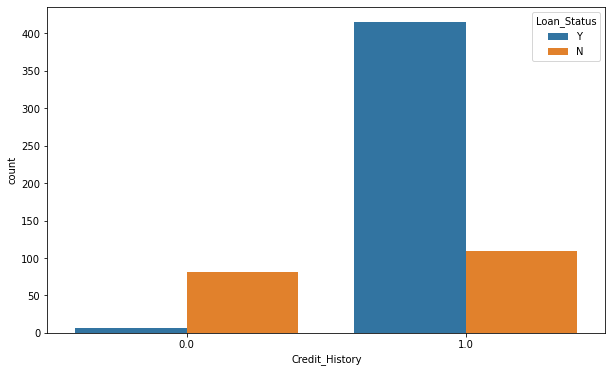

In [47]:
print(df["Credit_History"].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

### The One Who have credict history are having maximum chances of getting Loan Approval and compared to the one who havent taken any loan before

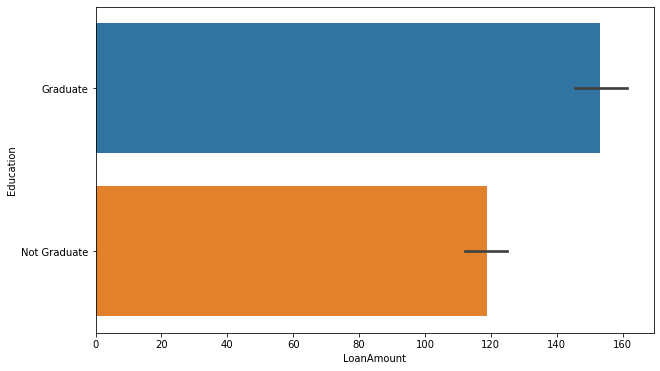

In [48]:
plt.figure(figsize = (10,6))
sns.barplot(df["LoanAmount"], df['Education'])
plt.show()

## The Loan Amount of Graduates are more as compared to Non Graduates ..This increment in Education is Bcz of their Education

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


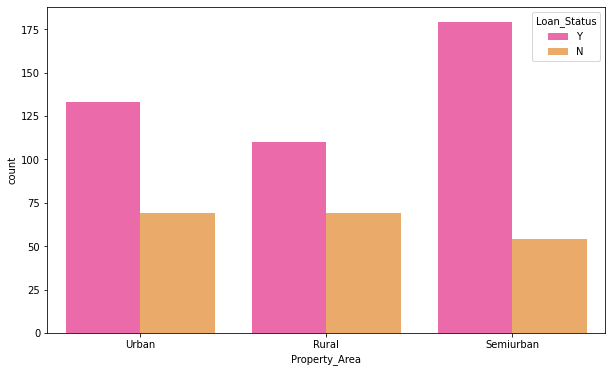

In [49]:
print(df["Property_Area"].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="spring")
plt.show()

### We can see that People of Semiurban area are applying for loans in large number and the maximum loan is granted to them only and than followed by Urban And The least is Rural areas

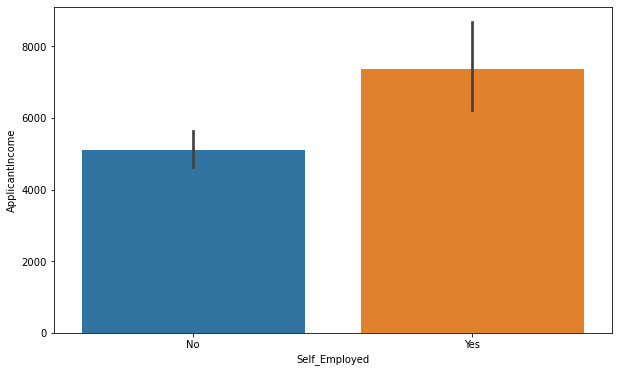

In [50]:
plt.figure(figsize = (10,6))
sns.barplot(df["Self_Employed"],df["ApplicantIncome"])
plt.show()

### In case of Self Employed the Applicatant whose income is above 4500 have the higher chances of getting loans approved..

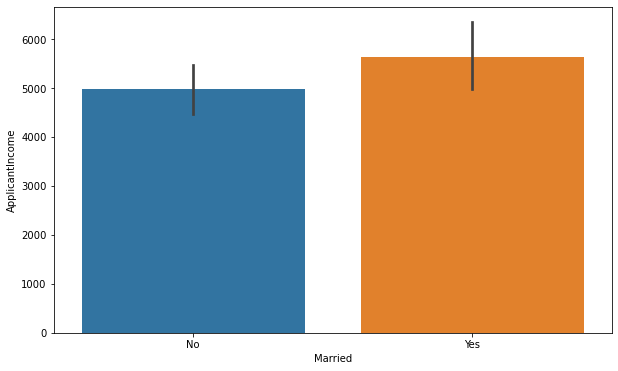

In [51]:
plt.figure(figsize = (10,6))
sns.barplot(df["Married"],df["ApplicantIncome"])
plt.show()

### We can see that The people who are married are having little higher income as compared to Singles..that why there chances of getting their loan approved are more

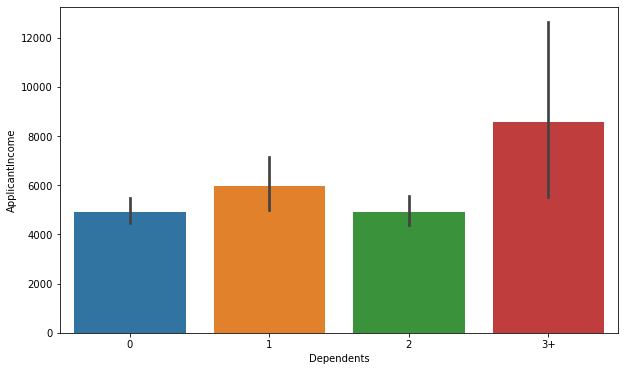

In [52]:
plt.figure(figsize = (10,6))
sns.barplot(df["Dependents"],df["ApplicantIncome"])
plt.show()

## The applicants who are having more than 3+ dependent are having good Income as compared to others

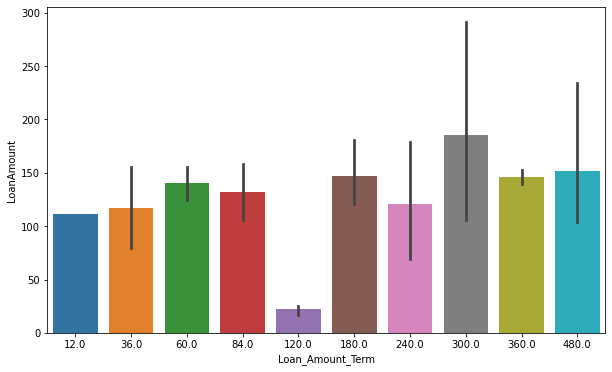

In [53]:
plt.figure(figsize = (10,6))
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.show()


### We can see that as higher the loan ,the repayment period as also increase ..

<h2 style='text-align:center;font-size:40px;background-color:green;border:40px;color:yellow'> C. Multi-variate Analysis <h2>

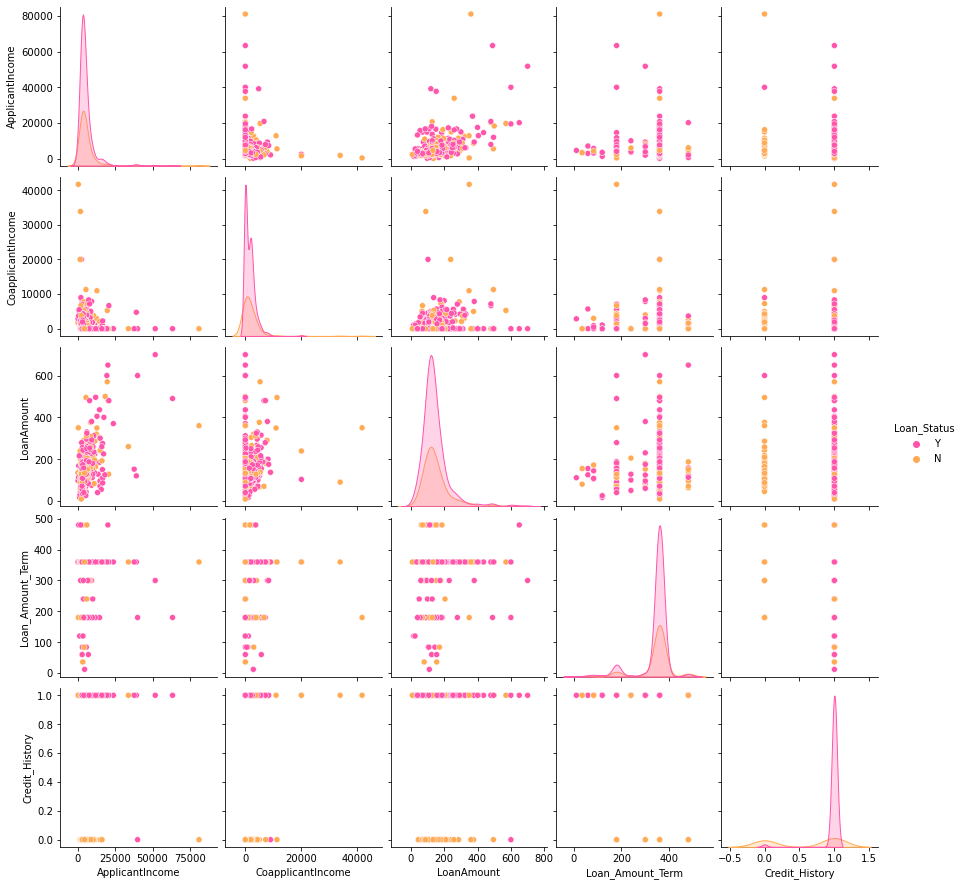

In [54]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status",palette="spring")

### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable `"Loan_Status"`. Here we can observe the relation between the features and label.

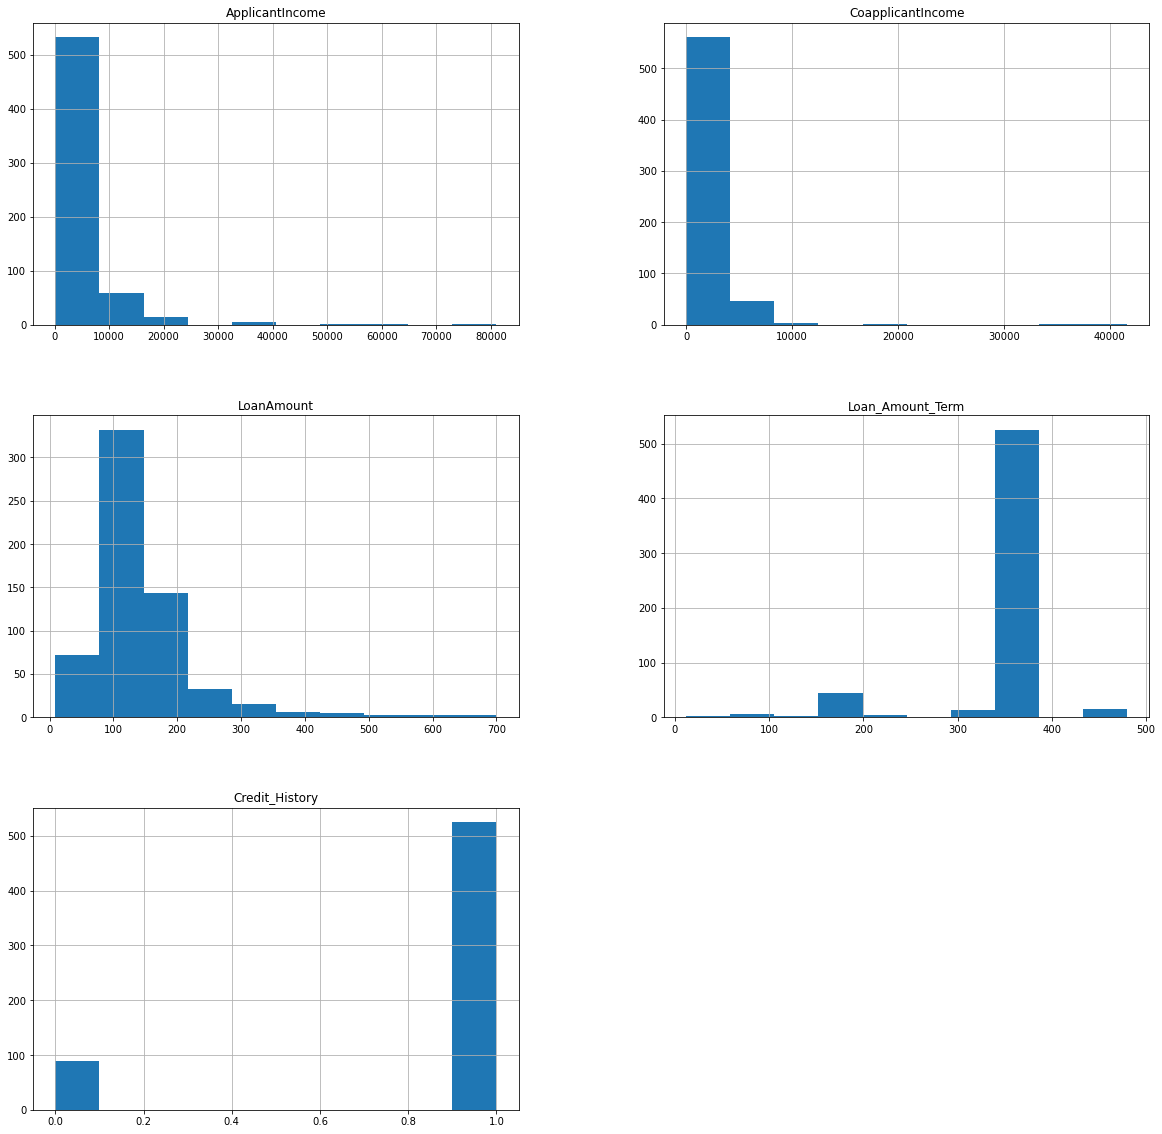

In [55]:
df.hist(bins=10, figsize=(20,20))
plt.show()

### Here It will Show only Numerical Columns And We can alot of skewness present in the dataset which is Needed to be removed

ApplicantIncome         AxesSubplot(0.125,0.787927;0.227941x0.0920732)
CoapplicantIncome    AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
LoanAmount           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
Loan_Amount_Term        AxesSubplot(0.125,0.677439;0.227941x0.0920732)
Credit_History       AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
dtype: object

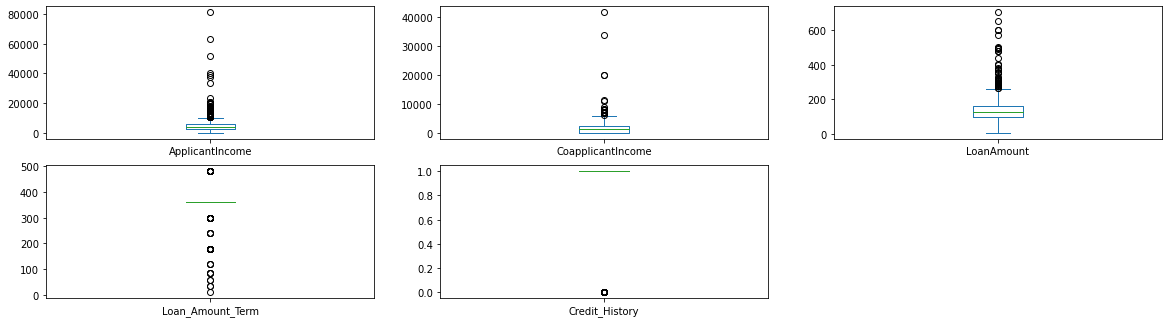

In [56]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

### Here We can see that all the Numerical columns have Outliers present which is needed to be Removed and we will do it later

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> CORRELATION <h2>

# Lets Convert all catagorical columns to into int format By Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [59]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [60]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## All the catagorical column is converted to int format

In [61]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


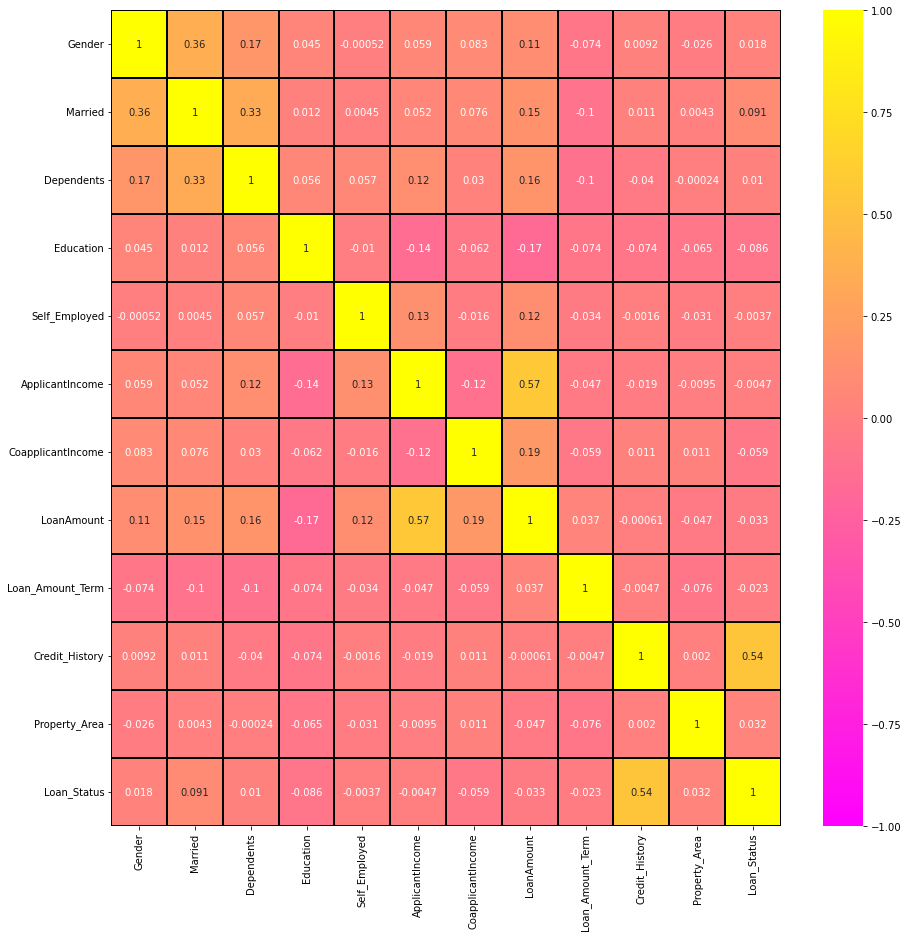

In [62]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="spring")
plt.yticks(rotation=0);

## This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation

In [63]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

### We can see that some columns are Negatively correlated and some are positively correlated ..Max positively correlated column is :- Credit_History and Max Negetively column is :- Education

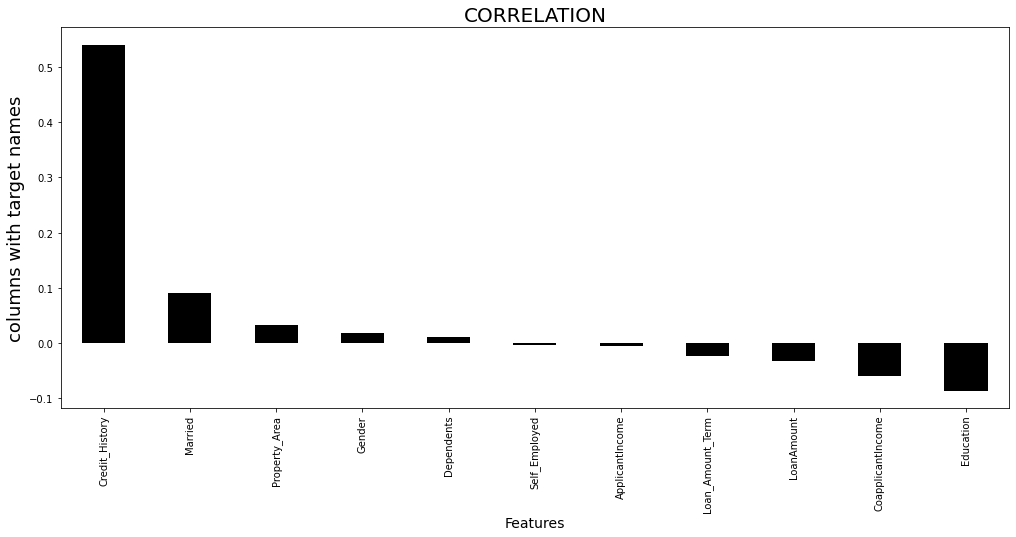

In [64]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

### Here we can see the least correlated columns are-> Self Employed and Applicant Income and the max postive and Negative correlated columns as Credit History and Education.

<h2 style='text-align:center;font-size:40px;background-color:green;border:40px;color:white'> DESCRIPTIVE STATISTICS <h2>

In [65]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


## We can see all columns having count 614. Looks like it doesn't contain missing values.

<AxesSubplot:>

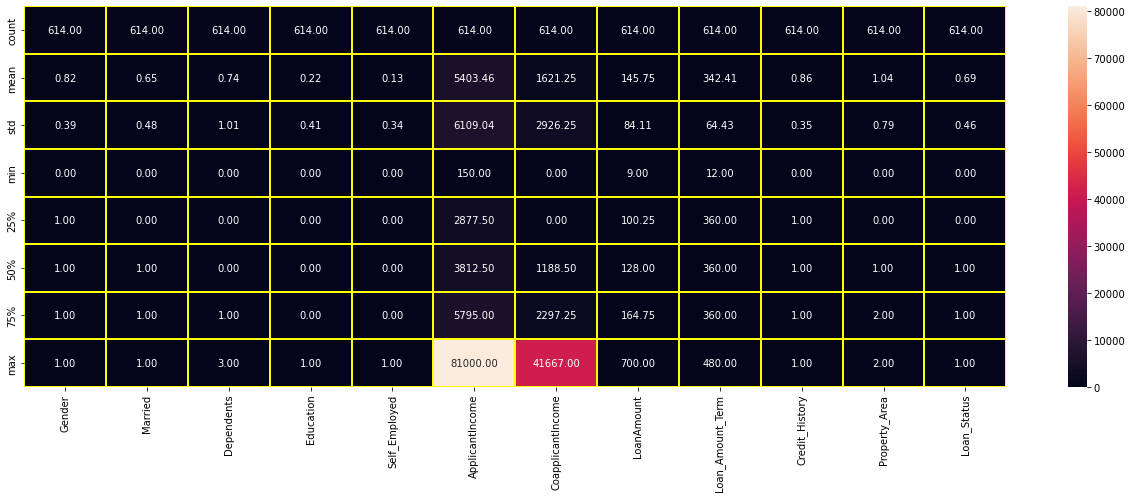

In [66]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

## Outcome of describe() of dataset :-
**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**`Rows :- 32536`**

**`columns :- 13`**

<h2 style='text-align:center;font-size:40px;background-color:pink;border:40px;color:yellow'> Now lets Check Outliers in the dataset <h2>

Gender                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
Married              AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
Dependents           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
Education               AxesSubplot(0.125,0.677439;0.227941x0.0920732)
Self_Employed        AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
ApplicantIncome      AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
CoapplicantIncome       AxesSubplot(0.125,0.566951;0.227941x0.0920732)
LoanAmount           AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
Loan_Amount_Term     AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
Credit_History          AxesSubplot(0.125,0.456463;0.227941x0.0920732)
Property_Area        AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
Loan_Status          AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
dtype: object

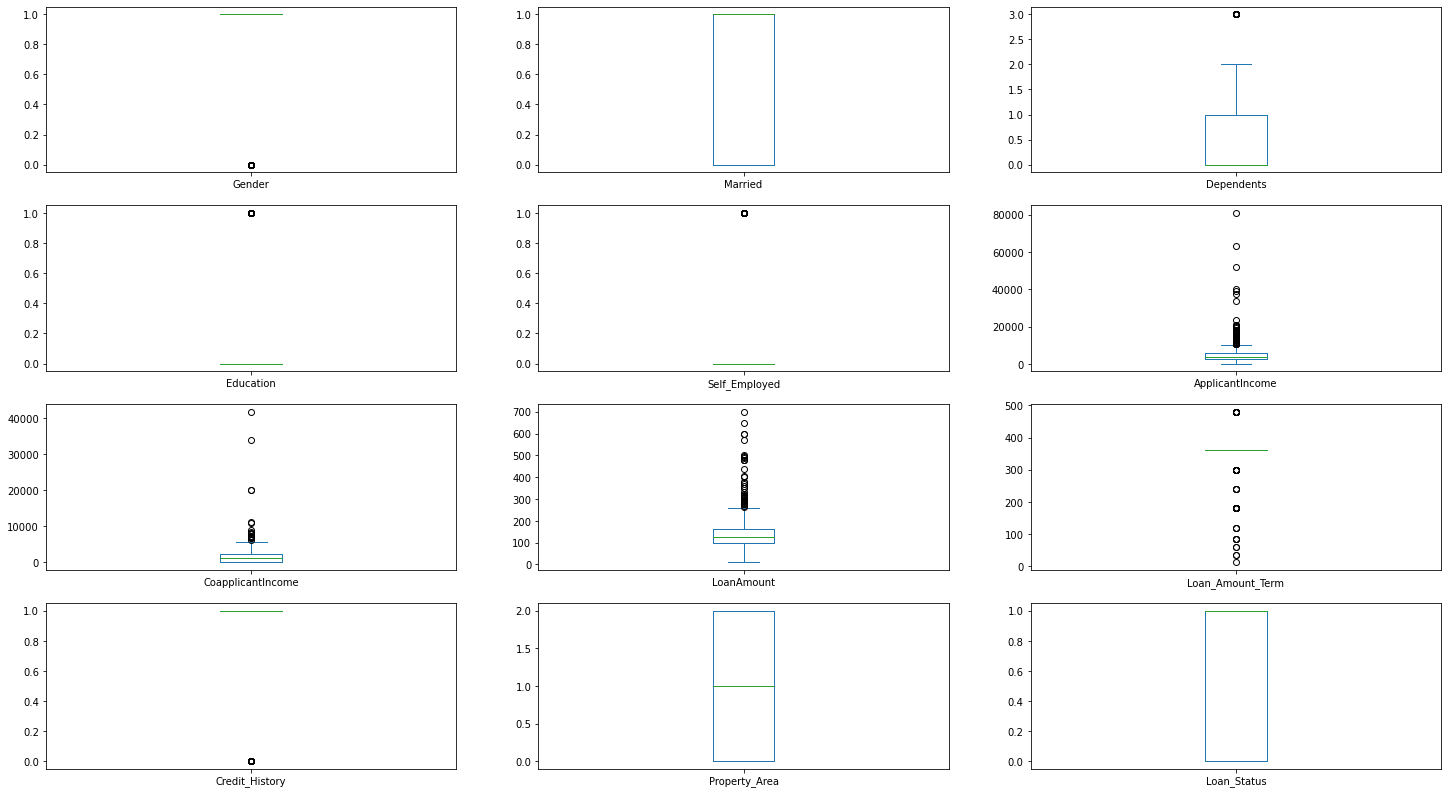

In [67]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(25,25))

### ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History are columns having Outliers rest all columns have Outliers ..Rest all columns are catagorical so we will not consider it

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:black'> Lets Check Skewness <h2>

In [68]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

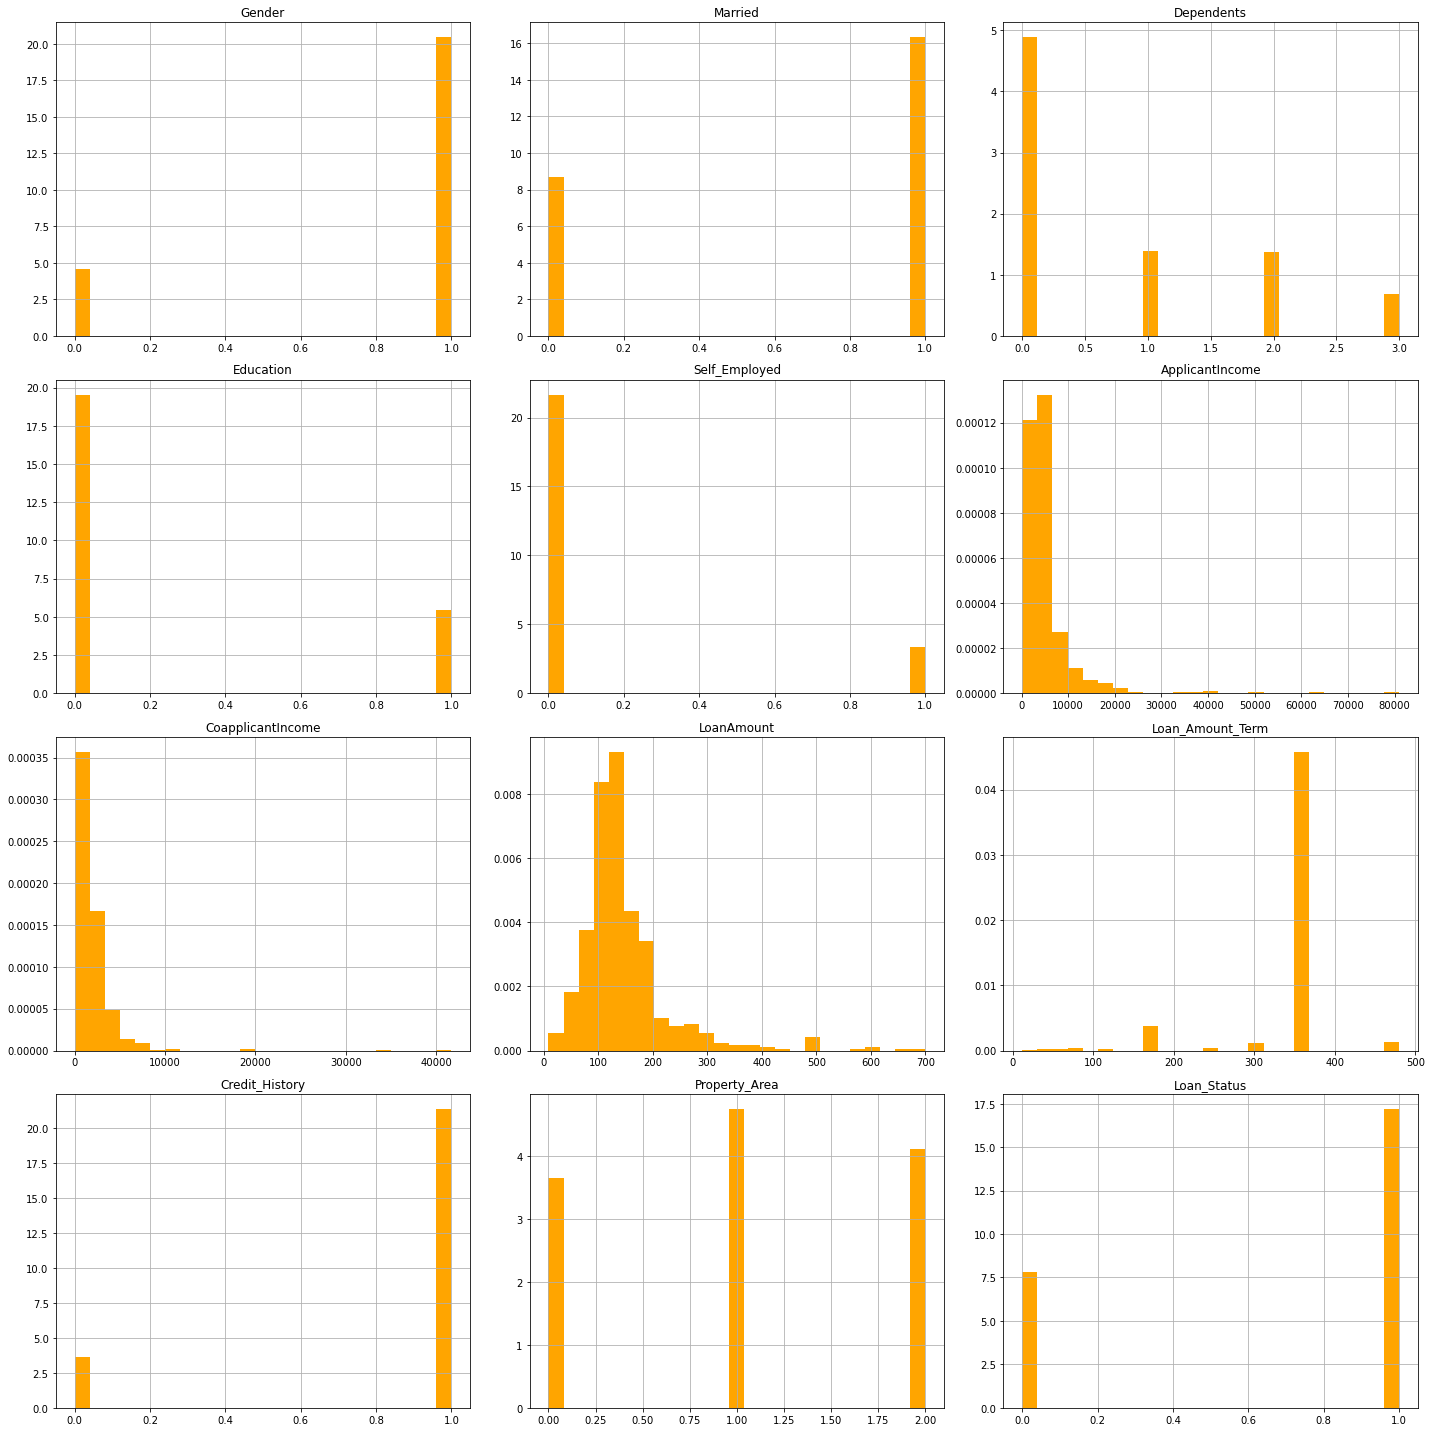

In [69]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='orange',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

# This plot show Skewness in all the columns ..

<h2 style='text-align:center;font-size:50px;background-color:Black;border:30px;color:green'> Now Lets Remove Outliers Now <h2>

# ZSCORE METHOD

In [70]:
# Features containing outliers
features = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.211241,0.273231,0.411733
1,0.134412,0.038732,0.211241,0.273231,0.411733
2,0.393747,0.554487,0.948996,0.273231,0.411733
3,0.462062,0.251980,0.306435,0.273231,0.411733
4,0.097728,0.554487,0.056551,0.273231,0.411733
...,...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231,0.411733
610,0.212557,0.554487,1.258378,2.522836,0.411733
611,0.437174,0.472404,1.276168,0.273231,0.411733
612,0.357064,0.554487,0.490816,0.273231,0.411733


In [71]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [72]:
df_new.shape

(577, 12)

In [73]:
df.shape

(614, 12)

In [74]:
# Percentage of data loss

DataLoss=((614-577)/614)*100
DataLoss

6.026058631921824

## 6.026058631921824% is the data lossed during removal of Outliers by ZScore Method

## IQR METHOD

In [75]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [76]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (614, 12)

New DataFrame data in Rows and Column: (207, 12)

Total Dropped rows: 407


In [77]:
#Percentage Data Loss using IQR
data_loss1 = (614-207)/614*100
data_loss1

66.28664495114006

## 66.28664495114006% is the data lossed during removal of Outliers by IQR Method

### SO HERE WE WILL GO WITH ZSCORE METHOD BECAUSE IT HAS LESS DATALOSS AS COMPARED TO IQR

<h2 style='text-align:center;font-size:50px;background-color:purple;border:40px;color:white'> *Now Lets Remove Skewness Now* <h2>


In [78]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

### columns Credit_History and Loan_Amount_Term have categorical data of integer type so no need to remove skewness in these columns.

In [79]:
L1=['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [80]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [81]:
#Removing skewness using yeo-johnson
df_new[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = PT.fit_transform(df_new[['ApplicantIncome','CoapplicantIncome','LoanAmount']].values)

In [82]:
#Checking skewness after removing skewness by power transform
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## We can see that all the Numerical column is Normalized Now

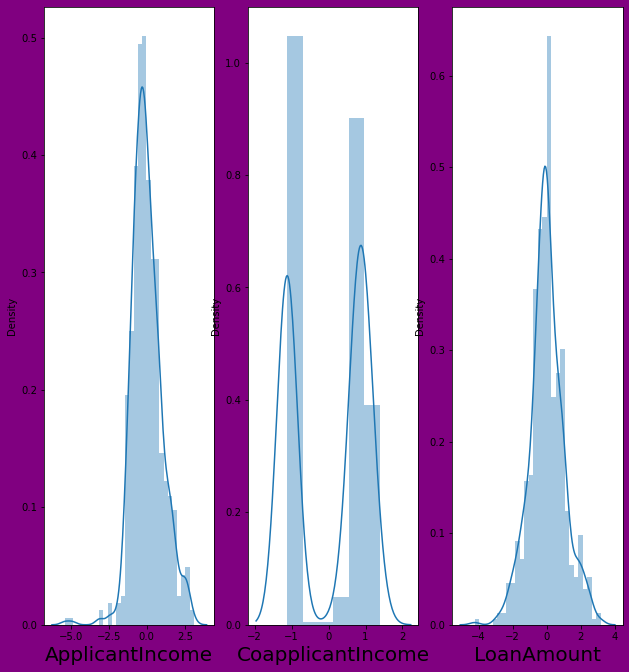

In [83]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(25,25), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Now all the Numerical columns are Normalized and skewness free

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> Now Lets Split the dataset into dependent and independent variable <h2>

In [84]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


In [85]:
x=df_new.loc [:,df_new.columns != 'Loan_Status']
# Independent Variable

In [86]:
y=df_new.loc[:,'Loan_Status']
#Dependent Variable

In [87]:
x.shape

(577, 11)

In [88]:
y.shape

(577,)

# Balancing the dataset over here,otherwise it will be a baised dataset`

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [91]:
x.shape

(796, 11)

In [92]:
y.shape

(796,)

## We can see that the size of the row have been increased in order to balance the dataset

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

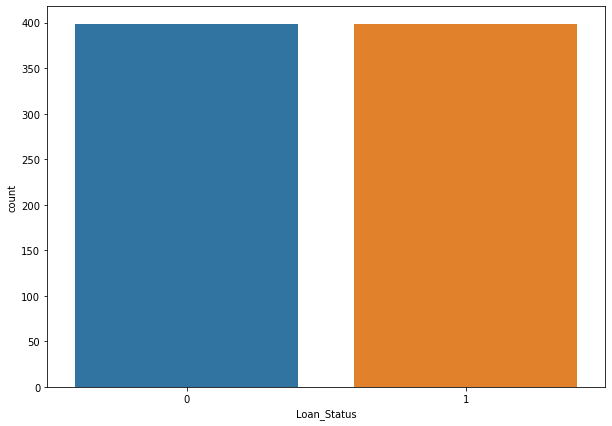

In [93]:
plt.figure(figsize=(10,7))
sns.countplot(y)

<h2 style='text-align:center;font-size:40px;background-color:Black;border:40px;color:green'> Now Lets Scale The Dataset <h2>

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.495678,-1.200716,-0.701560,-0.515268,-0.322525,0.700966,-1.063480,-0.007976,0.224606,0.566603,1.296094
1,0.495678,0.832837,0.326878,-0.515268,-0.322525,0.229457,0.797152,-0.007976,0.224606,0.566603,-1.195913
2,0.495678,0.832837,-0.701560,-0.515268,3.100538,-0.574312,-1.063480,-1.486782,0.224606,0.566603,1.296094
3,0.495678,0.832837,-0.701560,1.940739,-0.322525,-0.853603,0.948340,-0.166660,0.224606,0.566603,1.296094
4,0.495678,-1.200716,-0.701560,-0.515268,-0.322525,0.750615,-1.063480,0.236234,0.224606,0.566603,1.296094
...,...,...,...,...,...,...,...,...,...,...,...
791,0.495678,-1.200716,-0.701560,1.940739,-0.322525,-0.569871,0.921600,0.021177,-3.205962,-1.278265,1.296094
792,0.495678,0.832837,1.355316,-0.515268,-0.322525,-0.523766,0.910729,-0.003962,0.224606,-1.917380,-1.195913
793,0.495678,0.832837,1.355316,-0.515268,-0.322525,0.307310,1.018290,1.288361,0.224606,0.566603,-1.195913
794,-2.017440,-1.200716,-0.701560,-0.515268,-0.322525,-0.510360,-1.063480,-1.726621,0.224606,0.566603,-1.195913


# WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [98]:
vif_cal()

    VIF FACTOR           FEATURES
0     1.220641             Gender
1     1.429696            Married
2     1.200083         Dependents
3     1.070988          Education
4     1.041669      Self_Employed
5     1.811373    ApplicantIncome
6     1.659948  CoapplicantIncome
7     1.618557         LoanAmount
8     1.045950   Loan_Amount_Term
9     1.017514     Credit_History
10    1.034495      Property_Area


## There is No Multicollinearity Pressent in the dataset

# Model Training and Testing

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
lr=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {accuracy_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {accuracy_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.7468553459119497
At random state 0,the testing accuracy is :- 0.74375



At random state 1,the training accuracy is :- 0.7657232704402516
At random state 1,the testing accuracy is :- 0.7



At random state 2,the training accuracy is :- 0.7562893081761006
At random state 2,the testing accuracy is :- 0.675



At random state 3,the training accuracy is :- 0.7688679245283019
At random state 3,the testing accuracy is :- 0.75



At random state 4,the training accuracy is :- 0.7641509433962265
At random state 4,the testing accuracy is :- 0.7375



At random state 5,the training accuracy is :- 0.7641509433962265
At random state 5,the testing accuracy is :- 0.775



At random state 6,the training accuracy is :- 0.7515723270440252
At random state 6,the testing accuracy is :- 0.73125



At random state 7,the training accuracy is :- 0.7657232704402516
At random state 7,the testing accuracy is :- 0.71875



At random state 8,the training accuracy is :

At random state 78,the testing accuracy is :- 0.81875



At random state 79,the training accuracy is :- 0.7610062893081762
At random state 79,the testing accuracy is :- 0.74375



At random state 80,the training accuracy is :- 0.7688679245283019
At random state 80,the testing accuracy is :- 0.71875



At random state 81,the training accuracy is :- 0.7578616352201258
At random state 81,the testing accuracy is :- 0.71875



At random state 82,the training accuracy is :- 0.7562893081761006
At random state 82,the testing accuracy is :- 0.73125



At random state 83,the training accuracy is :- 0.7594339622641509
At random state 83,the testing accuracy is :- 0.75



At random state 84,the training accuracy is :- 0.7578616352201258
At random state 84,the testing accuracy is :- 0.70625



At random state 85,the training accuracy is :- 0.7830188679245284
At random state 85,the testing accuracy is :- 0.69375



At random state 86,the training accuracy is :- 0.7421383647798742
At random state 86,

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [103]:
lr.fit(x_train,y_train)

LogisticRegression()

In [104]:
pred_train=lr.predict(x_train)

In [105]:
pred_test=lr.predict(x_test)

In [106]:
accuracy_score(y_test,pred_test)

0.75

In [107]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70        81
           1       0.68      0.92      0.78        79

    accuracy                           0.75       160
   macro avg       0.78      0.75      0.74       160
weighted avg       0.79      0.75      0.74       160



## CROSS VALIDATION FOR LOGISTICS REGRESSION

In [109]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [110]:
for i in range(3,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 3
Cross validation score is :- 72.11661228543056
Accuracy_score is :- 75.0


At cv:- 4
Cross validation score is :- 73.86934673366834
Accuracy_score is :- 75.0


At cv:- 5
Cross validation score is :- 74.62893081761007
Accuracy_score is :- 75.0


At cv:- 6
Cross validation score is :- 73.62914862914862
Accuracy_score is :- 75.0


At cv:- 7
Cross validation score is :- 74.12890633663805
Accuracy_score is :- 75.0


At cv:- 8
Cross validation score is :- 73.64141414141415
Accuracy_score is :- 75.0


At cv:- 9
Cross validation score is :- 74.01827261377822
Accuracy_score is :- 75.0




In [111]:
# I will take CV as 3bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=3).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7211661228543056 
The accuracy_score is: 0.75


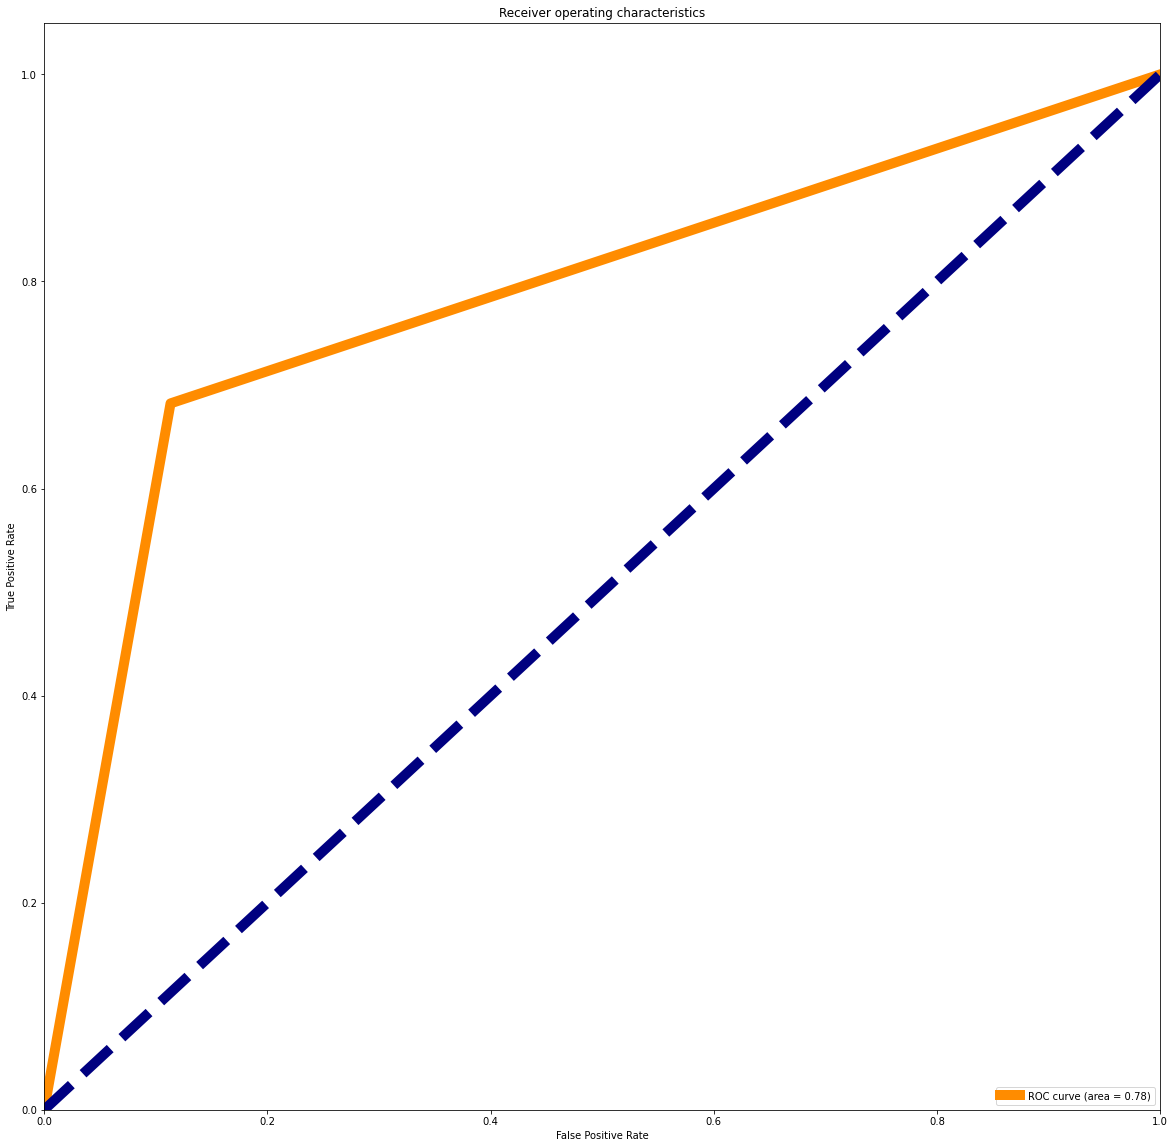

In [112]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that 73% of area is inside AUC ROC curve Which is good

# DECISION TREE CLASSIFIER

In [113]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())


0.725
[[58 23]
 [21 58]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        81
           1       0.72      0.73      0.73        79

    accuracy                           0.73       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.73      0.72      0.73       160

CV  :- 0.7814072327044025


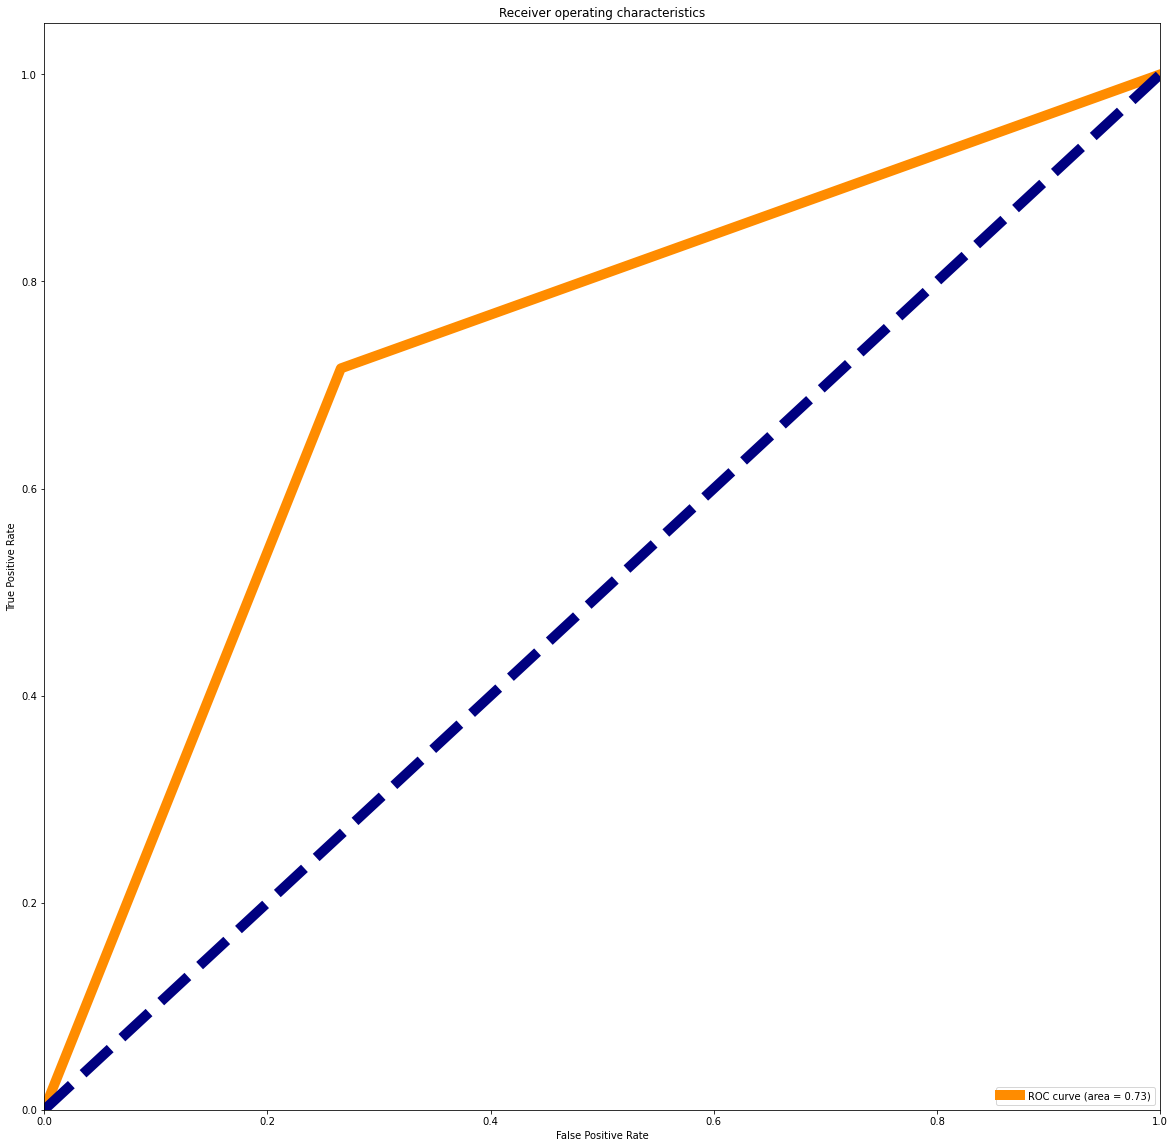

In [114]:
fpr,tpr,threshold=roc_curve(preddt,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that 73% of area is inside AUC ROC curve Which is good

# KNeighbors Classifier

In [115]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())


0.71875
[[51 30]
 [15 64]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69        81
           1       0.68      0.81      0.74        79

    accuracy                           0.72       160
   macro avg       0.73      0.72      0.72       160
weighted avg       0.73      0.72      0.72       160

CV  :- 0.7412185534591196


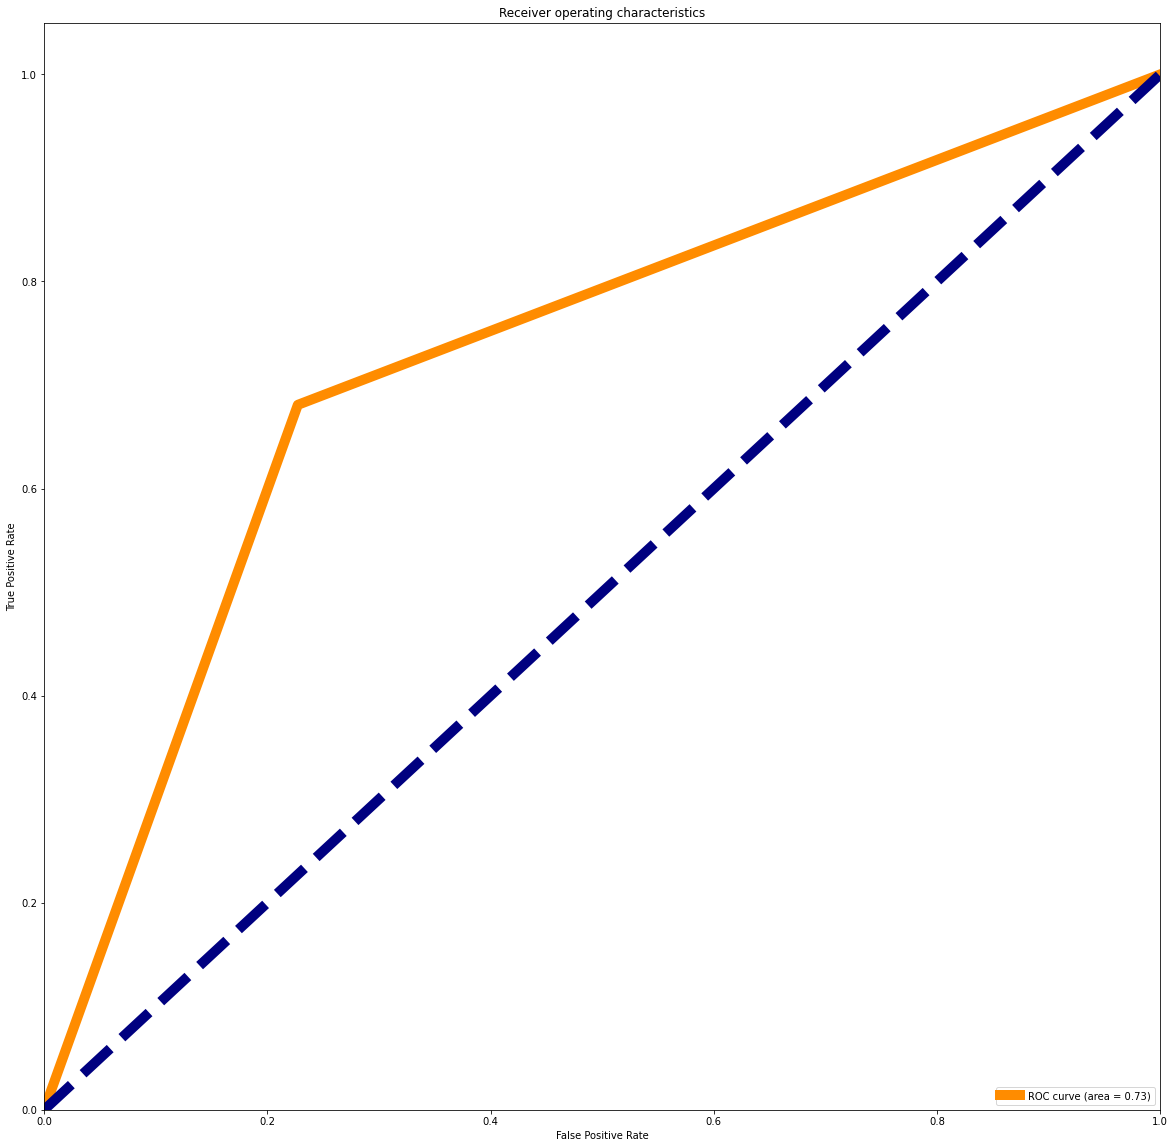

In [116]:
fpr,tpr,threshold=roc_curve(predknn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that 73% of area is inside AUC ROC curve Which is same as above 2 algorithm

## ENSEMBLE TECHNIQUE

In [117]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())


0.80625
[[62 19]
 [12 67]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        81
           1       0.78      0.85      0.81        79

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160

CV  :- 0.8267059748427673


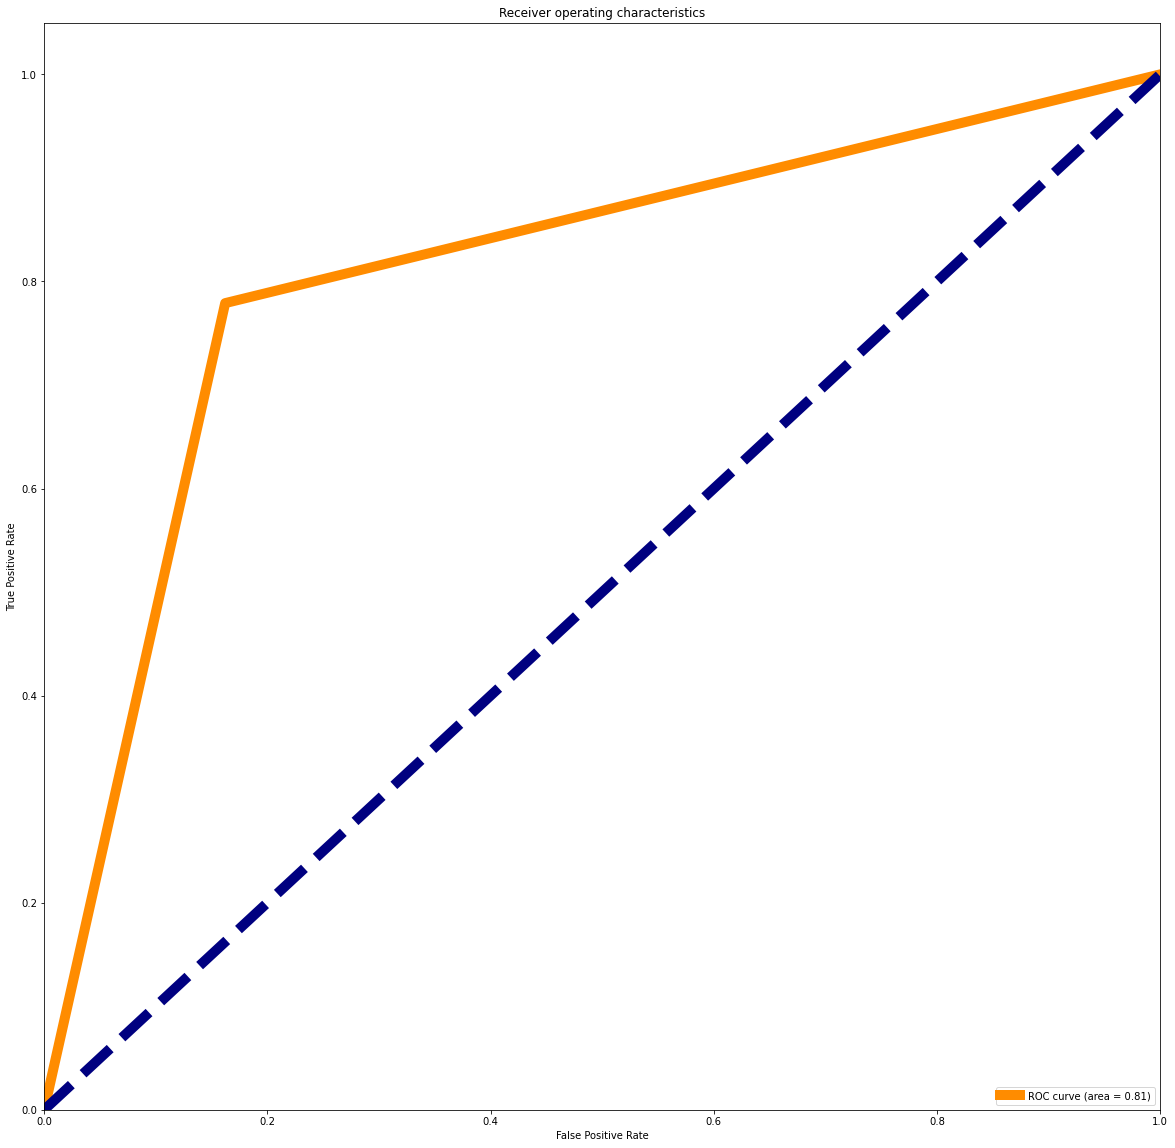

In [118]:
fpr,tpr,threshold=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 73% of area is inside AUC ROC curve Which is same as above 3 algorithm

In [119]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())


0.74375
[[54 27]
 [14 65]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        81
           1       0.71      0.82      0.76        79

    accuracy                           0.74       160
   macro avg       0.75      0.74      0.74       160
weighted avg       0.75      0.74      0.74       160

CV  :- 0.7651415094339622


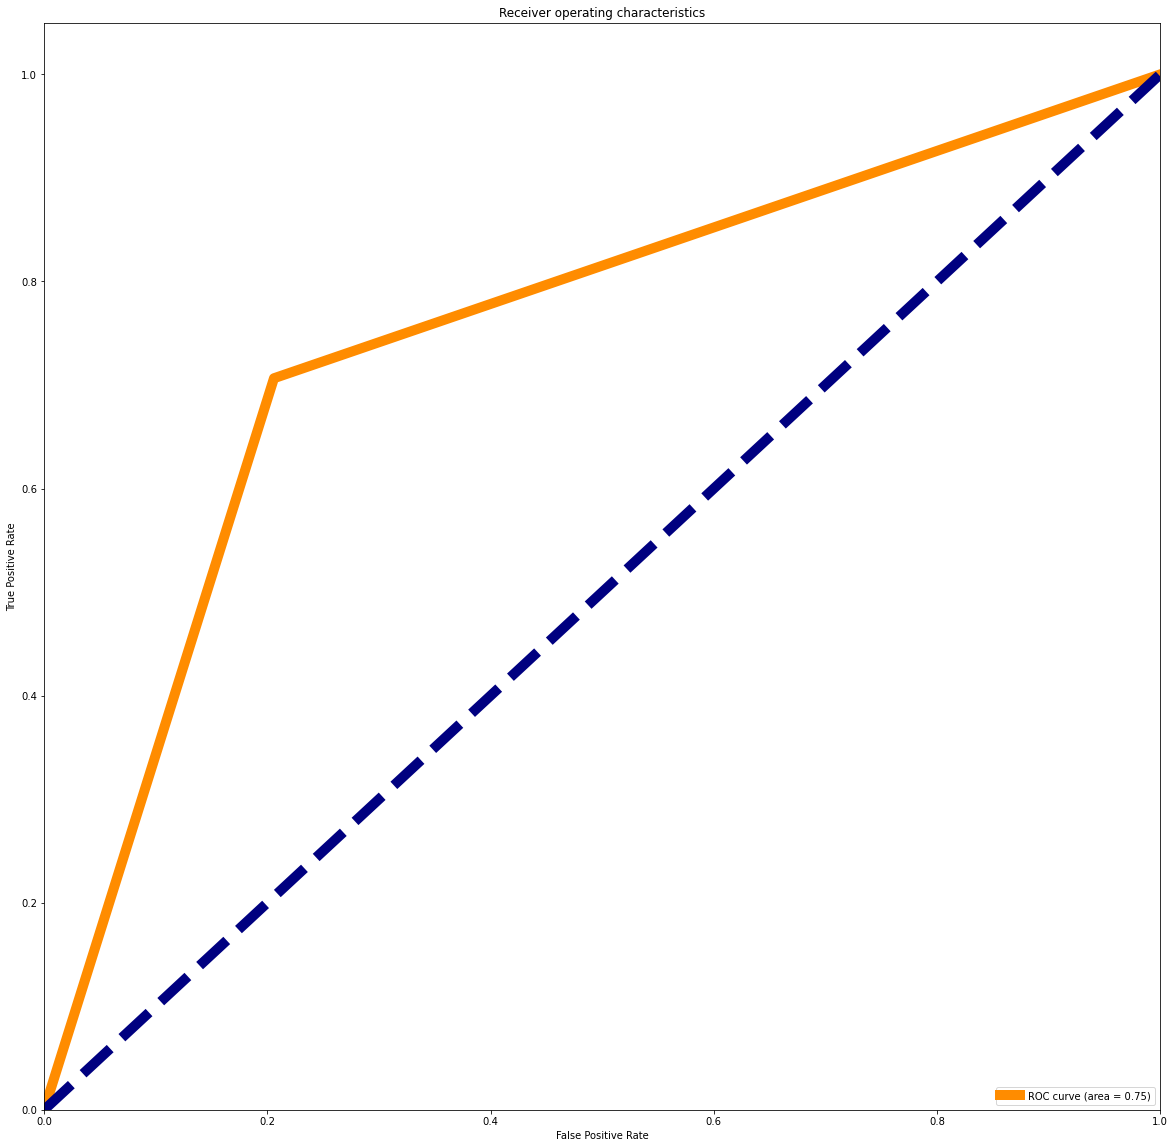

In [120]:
fpr,tpr,threshold=roc_curve(predgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 76% of area is inside AUC ROC curve Which is best till now

In [122]:
mm=pd.DataFrame([["LR","75%"],["Decision Tree Classifier","72%"],["KNeighbors Classifier","72%"],["Random Forest Classifier","81%"],["Gradient Boosting","74%"]],
                    columns=["Model_Name","AccuracyScore"])

mm

,Model_Name,AccuracyScore
0,LR,75%
1,Decision Tree Classifier,72%
2,KNeighbors Classifier,72%
3,Random Forest Classifier,81%
4,Gradient Boosting,74%


# Hyperparameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV


In [124]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [125]:
#RandomForestClassifier
parameters = {'bootstrap' : [True, False],'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[2,200],
             'max_depth':[2,3,4,6,7,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,40,42,44,46,48,50]}

In [126]:
qq=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [127]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30, 32, 34, 36, 40, 42,
                                       44, 46, 48, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 200]})

In [128]:
qq.best_params_

{'bootstrap': True,
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 200}

In [129]:
rf = RandomForestClassifier(bootstrap = True,max_depth=14, max_features='auto', n_estimators=200)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  78.75


### My hyperparameter tuning  percent is less than 1.25% but it is still performing better than rest of the model

# Now save the final model

In [130]:
#Saving the model using .pkl
import joblib
joblib.dump(rf,"Loan_study.pkl")

['Loan_study.pkl']

In [131]:
#Loading the saved model
aa=joblib.load("Loan_study.pkl")

In [132]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0])

In [133]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,1,1,0,0,0,1,0,0,1,1,...,1,0,0,1,1,1,1,1,1,0
Original,0,1,0,0,0,1,0,0,1,1,...,1,0,0,0,0,1,1,1,1,1


# Here My Project is completed

# -------------------------------------------------------------------------------------------------------------